In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp

#Distância até a praia

In [ ]:
import geopandas as gpd

In [ ]:
rj = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [ ]:
praias = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [ ]:
praias.head(25)

In [ ]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


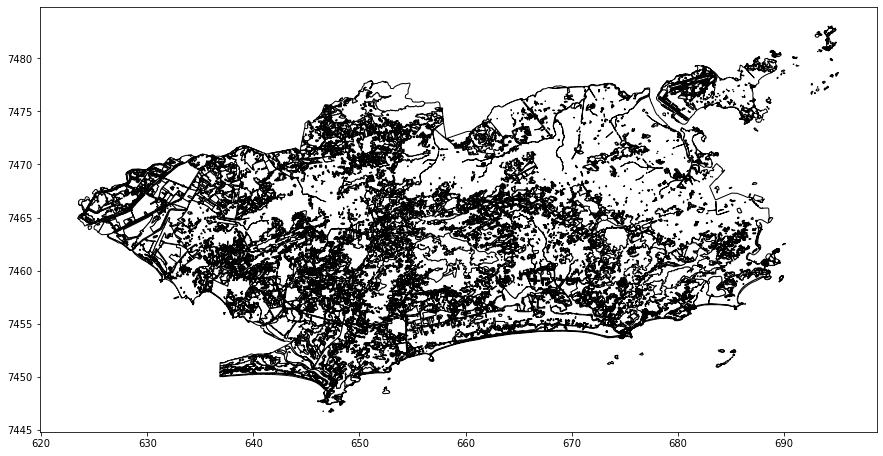

In [ ]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

In [ ]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [ ]:
praias = praias[praias['legenda'] == 'Praia']

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array in

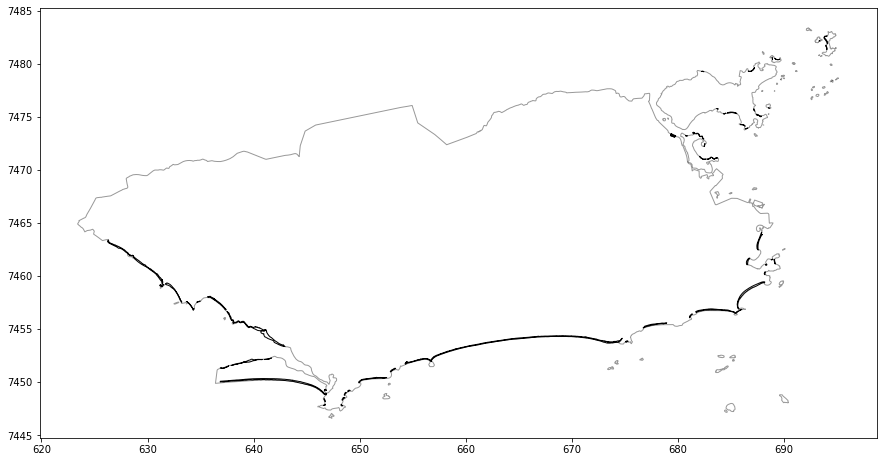

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8), alpha = 0.4)
praias.plot(ax = base, color='white', edgecolor='black', figsize=(15,8))

In [ ]:
geo_dados['Dist_Praia_km'] = geo_dados['geometry'].apply(lambda x: round(praias.distance(x).min(), 2))

In [ ]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,geometry,Dist_Praia_km
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,POINT (657.514 7453.832),1.14
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,POINT (670.524 7461.803),7.48
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,POINT (674.345 7469.440),6.24
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,POINT (662.701 7457.284),3.40
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,POINT (656.019 7453.574),1.37


In [ ]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Trans,Dist_Praia_km
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290762
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560716
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317726
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185845
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196558
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104602
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361534
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187790
Dist_Trans,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230642
Dist_Praia_km,-0.290762,0.560716,-0.317726,-0.185845,-0.196558,-0.104602,-0.361534,0.187790,0.230642,1.000000


In [ ]:
geo_dados.to_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

##Exercício

In [ ]:
estado_rj = gpd.read_file( 'drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/33MUE250GC_SIR.shp' )

In [ ]:
estado_rj = estado_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
estado_rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((568.439 7453.686, 568.426 7453..."
1,1469,3300159,APERIBÉ,"POLYGON ((801.294 7605.422, 801.334 7605.414, ..."
2,1470,3300209,ARARUAMA,"POLYGON ((785.286 7498.930, 785.290 7498.929, ..."
3,1471,3300225,AREAL,"POLYGON ((689.675 7543.879, 689.680 7543.894, ..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((809.736 7481.602, 809.875 7481..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((692.212 7553.895, 692.713 7554.052, ..."
88,1556,3306107,VALENÇA,"POLYGON ((621.608 7556.914, 621.627 7556.941, ..."
89,1557,3306156,VARRE-SAI,"POLYGON ((830.245 7692.122, 830.255 7692.130, ..."
90,1558,3306206,VASSOURAS,"POLYGON ((642.960 7532.379, 643.058 7532.369, ..."


In [ ]:
cidade_rj = estado_rj[estado_rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

In [ ]:
cidade_rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [ ]:
cidade_rj['Munic_Longe'] = estado_rj['NM_MUNICIP'].iloc[estado_rj['geometry'].apply(lambda x: cidade_rj.distance(x).iloc[0]).idxmax()]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
cidade_rj['Dist_max'] = estado_rj['geometry'].apply(lambda x: cidade_rj.distance(x).iloc[0]).max()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
cidade_rj[['Munic_Longe', 'Dist_max']]

,Munic_Longe,Dist_max
67,VARRE-SAI,233.225434
